# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [3]:
# Cell type : CodeRead


import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set.

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    feature_dim = int (np.shape(X_train[0])[0])
    pos_points = np.sum(Y_train == 1)
    neg_points = np.sum(Y_train == -1)
    X_train_pos=np.empty([0,feature_dim],dtype=float)
    X_train_neg=np.empty([0,feature_dim],dtype=float)

    for (X,Y) in zip(X_train,Y_train):
      if Y== -1.0:
        X_train_neg= np.vstack([X_train_neg,X])
      else:
          X_train_pos= np.vstack([X_train_pos,X])
    positive_mean = np.mean(X_train_pos, axis=0)
    negative_mean = np.mean(X_train_neg, axis=0)


    Prob_pos= (pos_points/(pos_points+neg_points))
    Prob_neg= (neg_points/(pos_points+neg_points))
    Y_test = np.empty([0],dtype=float)

    for X in X_test:
        X_mean_pos = X - positive_mean
        X_mean_transpose = np.transpose(X_mean_pos)

        class_prob_pos = np.power((1/(2*np.pi)),feature_dim/2)* np.exp((-.5)*(np.matmul(X_mean_transpose,X_mean_pos)))
        X_mean_neg = X - negative_mean
        X_mean_tranpose = np.transpose(X_mean_neg)
        class_prob_neg = np.power((1/(2*np.pi)),feature_dim/2)* np.exp((-.5)*(np.matmul(X_mean_transpose,X_mean_neg)))

        posterior_pos = Prob_pos*class_prob_pos
        posterior_neg = Prob_neg*class_prob_neg

        if(posterior_pos >= posterior_neg):
          Y_test=np.append(Y_test,1)
        else :
          Y_test=np.append(Y_test,-1)

    return Y_test

def Bayes1b(X_train, Y_train, X_test):
    feature_dim = int (np.shape(X_train[0])[0])
    pos_points = np.sum(Y_train == 1)
    neg_points = np.sum(Y_train == -1)

    X_train_pos=np.empty([0,feature_dim],dtype=float)
    X_train_neg=np.empty([0,feature_dim],dtype=float)
    # arrange pos,neg point seaprate array
    for (X,Y) in zip(X_train,Y_train):
      if Y== -1.0:
        X_train_neg= np.vstack([X_train_neg,X])
      else:
          X_train_pos= np.vstack([X_train_pos,X])
    #calculate mean for each feature column
    positive_means = np.mean(X_train_pos, axis=0)
    negative_means = np.mean(X_train_neg, axis=0)

    cov_matrix = np.cov(np.transpose(X_train))
    cov_inverse = np.linalg.inv(cov_matrix)

    Y_test = np.empty([0],dtype=float)

    Prob_pos= (pos_points/(pos_points+neg_points))
    Prob_neg= (neg_points/(pos_points+neg_points))

    for X in X_test:
        X_mean_pos = X - positive_means
        X_mean_tran_pos = np.transpose(X_mean_pos)
        class_prob_pos = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_matrix),-(.5))* np.exp((-.5)*np.matmul(X_mean_tran_pos,np.matmul(cov_inverse,X_mean_pos)))

        X_mean_neg = X - negative_means
        X_mean_tran_neg = np.transpose(X_mean_neg)
        class_prob_neg = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_matrix),-(.5))* np.exp((-.5)*np.matmul(X_mean_tran_neg,np.matmul(cov_inverse,X_mean_neg)))
        posterior_pos = Prob_pos*class_prob_pos
        posterior_neg = Prob_neg*class_prob_neg

        if(posterior_pos >= posterior_neg):
          Y_test=np.append(Y_test,1)
        else :
          Y_test=np.append(Y_test,-1)

    return Y_test

def Bayes1c(X_train, Y_train, X_test):
    feature_dim = int (np.shape(X_train[0])[0])
    pos_points = np.sum(Y_train == 1)
    neg_points = np.sum(Y_train == -1)

    X_train_pos=np.empty([0,feature_dim],dtype=float)
    X_train_neg=np.empty([0,feature_dim],dtype=float)
    # arrange pos,neg point seaprate array
    for (X,Y) in zip(X_train,Y_train):
      if Y== -1.0:
        X_train_neg= np.vstack([X_train_neg,X])
      else:
          X_train_pos= np.vstack([X_train_pos,X])
    #calculate mean for each feature column
    positive_means = np.mean(X_train_pos, axis=0)
    negative_means = np.mean(X_train_neg, axis=0)

    cov_pos = np.cov(np.transpose(X_train_pos),bias=True)
    cov_neg = np.cov(np.transpose(X_train_neg),bias=True)

    cov_inverse_pos=np.linalg.inv(cov_pos)
    cov_inverse_neg=np.linalg.inv(cov_neg)
    Y_test = np.empty([0],dtype=float)

    Prob_pos= (pos_points/(pos_points+neg_points))
    Prob_neg= (neg_points/(pos_points+neg_points))

    for X in X_test:
      #for each data point caclute X-mu
        X_mean_pos = X - positive_means
        X_mean_tran_pos = np.transpose(X_mean_pos)
        class_prob_pos = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_pos),-(.5))* np.exp((-.5)*np.matmul(X_mean_tran_pos,np.matmul(cov_inverse_pos,X_mean_pos)))

        X_mean_neg = X - negative_means
        X_mean_tran_neg = np.transpose(X_mean_neg)
        class_prob_neg = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_neg),-(.5))* np.exp((-.5)*np.matmul(X_mean_tran_neg,np.matmul(cov_inverse_neg,X_mean_neg)))
        posterior_pos = Prob_pos*class_prob_pos
        posterior_neg = Prob_neg*class_prob_neg

        if(posterior_pos >= posterior_neg):
          Y_test=np.append(Y_test,1)
        else :
          Y_test=np.append(Y_test,-1)

    return Y_test




In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


In [ ]:
def plot_classifiers(data, dataset_num):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']

    min1, max1 = X_test[:, 0].min()-1, X_test[:, 0].max()+1
    min2, max2 = X_test[:, 1].min()-1, X_test[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    grid = np.c_[xx.ravel(), yy.ravel()]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, bayes_func in enumerate([Bayes1a, Bayes1b, Bayes1c]):
        ax = axes[i]

        Y_pred_grid = bayes_func(X_train, Y_train, grid).reshape(xx.shape)
        ax.contourf(xx, yy, Y_pred_grid, colors=['lightcoral', 'lightgreen'])

        Y_pred_test = bayes_func(X_train, Y_train, X_test)
        ax.plot(X_test[Y_train == 1, 0], X_test[Y_train == 1, 1], 'rx')
        ax.plot(X_test[Y_train == -1, 0], X_test[Y_train == -1, 1], 'b+')

        ax.set_title(f'Dataset_{dataset_num} Bayes1{chr(97 + i)}')
        ax.set_xlabel('x_d1')
        ax.set_ylabel('x_d2')

    plt.tight_layout()
    plt.show()

# Load and plot datasets
data_paths = ['/content/drive/MyDrive/PRML ASSIgn/dataset1_1.npz',
              '/content/drive/MyDrive/PRML ASSIgn/dataset1_2.npz',
              '/content/drive/MyDrive/PRML ASSIgn/dataset1_3.npz']

for i, path in enumerate(data_paths, start=1):
    data = np.load(path)
    plot_classifiers(data, i)



** Cell type : TextWrite **
(Write your observations and table of errors here)




** Cell type : TextRead **


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [ ]:
# Cell type : CodeWrite
# Fill in functions in this cell

Loss_matrix = np.matrix([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

def Bayes2a(X_train, Y_train, X_test):
    feature=X_train.shape[1]
    tot_class= len(np.unique(Y_train))
    prior_probs=np.zeros(tot_class+1)
    class_means = np.zeros((tot_class+1, feature))
    [n,] = Y_train.shape
    for c in range(1,tot_class+1):
        prior_probs[c] = np.count_nonzero(Y_train == c)/n
        class_means[c] = np.mean(X_train[Y_train == c], axis=0)

    predicted_probs = np.zeros((X_test.shape[0], tot_class))

    for i, x in enumerate(X_test):
        for j in range(1,tot_class+1):
            # Compute probability density function for each class
            likelihood = np.exp(-0.5 * np.sum((x - class_means[j])**2))
            predicted_probs[i, j-1] = likelihood * prior_probs[j]
    y_pred = np.argmin(np.dot(predicted_probs,np.transpose(Loss_matrix)), axis=1)+1
    return y_pred

def Bayes2b(X_train, Y_train, X_test):
    feature_dim=X_train.shape[1]
    tot_class= len(np.unique(Y_train))
    prior_probs=np.zeros(tot_class+1)
    class_means = np.zeros((tot_class+1, feature_dim))
    [n,] = Y_train.shape
    for c in range(1,tot_class+1):
        prior_probs[c] = np.count_nonzero(Y_train == c)/n
        class_means[c] = np.mean(X_train[Y_train == c], axis=0)

    predicted_probs = np.zeros((X_test.shape[0], tot_class))
    cov_matrix = np.cov(np.transpose(X_train))
    cov_inverse = np.linalg.inv(cov_matrix)
    for i, x in enumerate(X_test):
        for j in range(1,tot_class+1):
            X_mean_classes=x-class_means[j]
            X_mean_classes_trans=np.transpose(X_mean_classes)
            class_prob = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_matrix),-(.5))* np.exp((-.5)*np.matmul(X_mean_classes_trans,np.matmul(cov_inverse,X_mean_classes)))
            predicted_probs[i, j-1] = class_prob * prior_probs[j]
    y_pred = np.argmin(np.dot(predicted_probs,np.transpose(Loss_matrix)), axis=1)+1
    return y_pred

def Bayes2c(X_train, Y_train, X_test):
    feature_dim=X_train.shape[1]
    tot_class= len(np.unique(Y_train))
    prior_probs=np.zeros(tot_class)
    class_means = np.zeros((tot_class, feature_dim))
    cov_matrix = []
    [n,] = Y_train.shape
    for c in range(1,tot_class+1):
      prior_probs[c-1] = np.count_nonzero(Y_train == c)/n
      class_means[c-1] = np.mean(X_train[Y_train == c], axis=0)
      cov_matrix.append(np.cov(np.transpose(X_train[Y_train == c])))

    predicted_probs = np.zeros((X_test.shape[0], tot_class))

    for i, x in enumerate(X_test):
        for j in range(tot_class):
            # Compute probability density function for each class
            X_mean_classes=x-class_means[j]
            X_mean_classes_trans=np.transpose(X_mean_classes)
            cov_inverse = np.linalg.inv(cov_matrix[j])
            class_prob = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_matrix[j]),-(.5))* np.exp((-.5)*np.matmul(X_mean_classes_trans,np.matmul(cov_inverse,X_mean_classes)))
            predicted_probs[i, j] = class_prob * prior_probs[j]

    y_pred = np.argmin(np.dot(predicted_probs,np.transpose(Loss_matrix)), axis=1)+1
    return y_pred




In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately.

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets.


In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)

import matplotlib.pyplot as plt
import numpy as np

def plot_results(datasets):
    for i, (dataset_name, dataset) in enumerate(datasets.items()):
        X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']

        # Generate meshgrid for contour plotting
        X_min = np.min(X_train, axis=0)
        X_max = np.max(X_train, axis=0)
        X, Y = np.meshgrid(np.arange(X_min[0]-0.5, X_max[0]+0.5, 0.1), np.arange(X_min[1]-0.5, X_max[1]+0.5, 0.1))
        samples = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

        # Compute classifier outputs
        Z_a = Bayes2a(X_train, Y_train, samples)
        Z_b = Bayes2b(X_train, Y_train, samples)
        Z_c = Bayes2c(X_train, Y_train, samples)

        # Plotting
        plt.figure(i)
        f, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(15, 5))
        classifiers = {'Classifier 2a': Z_a, 'Classifier 2b': Z_b, 'Classifier 2c': Z_c}
        for ax, (clf_name, Z) in zip(axes, classifiers.items()):
            Z = Z.reshape(X.shape)
            ax.contourf(X, Y, Z, colors=['#FFB6C1', '#90EE90', '#000000', '#ADD8E6'])
            for class_label in np.unique(Y_train):
                ax.scatter(X_train[Y_train == class_label][:, 0], X_train[Y_train == class_label][:, 1], s=2, label=f'Class {class_label}')
            ax.set_title(f'{clf_name} on {dataset_name}')
            ax.legend()
            ax.set_xlabel(r'$x_{1}\rightarrow$', size=15)
            ax.set_ylabel(r'$x_{2}\rightarrow$', size=15)

    plt.show()
# Define datasets
datasets = {'dataset2_1': np.load('/content/drive/MyDrive/PRML ASSIgn/dataset2_1.npz'),
            'dataset2_2': np.load('/content/drive/MyDrive/PRML ASSIgn/dataset2_2.npz')}

# Plot results
plot_results(datasets)


** Cell type : TextWrite **
(Write your observations and table of errors here)



In [ ]:
# Cell type: convenience



(4,)


**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels .

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




In [ ]:
# Cell type : CodeWrite

data=np.load("/content/drive/MyDrive/PRML ASSIgn/dataset3_1.npz")


#keys = data.keys()

# Print the keys
#print(keys)

X_train=data['arr_0']
Y_train=data['arr_1']
X_test=data['arr_2']
Y_test=data['arr_3']
topvalue = np.zeros((4, 2))
subset = [50, 100, 200, 1000]
degrees = [1, 2, 4, 8, 16]
lamb_da = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

def feature_phi(X,degree):
  phi=np.ones((X.shape[0],1))
  x1=np.zeros((len(X),1+degree))
  x2=np.zeros((len(X),1+degree))
  for i in range (0,1+degree):
    x1[:,i]=X[:,0]**i
    x2[:,i]=X[:,1]**i
  for i in range(0,1+degree):
    for j in range (0,1+degree):
      if i!=0 or j!=0:
        if i+j<=degree:
          phi=np.hstack((phi,(x1[:,j]*x2[:,i]).reshape(-1,1)))
  return phi

def polynomial_regression_prediction(X_test, wt_vector, degree):

    phi =feature_phi(X_test,degree)
    return np.dot(phi, wt_vector)

def polynomial_regression_train(X_train, Y_train, degree, lamb_da):

    phi = feature_phi(X_train,degree)

    identity_matrix = np.eye(phi.shape[1])
    w_vect = np.matmul(np.matmul(np.linalg.inv((lamb_da * identity_matrix + np.matmul(np.transpose(phi), phi))),(phi.T)),Y_train)
    return w_vect

train_sqr = np.zeros((len(subset ), len(degrees), len(lamb_da)))
test_sqr = np.zeros((len(subset ), len(degrees), len(lamb_da)))

for i in range(len(subset)):
  for j in range(len(degrees)):
    for k in range(len(lamb_da)):
      W_pred = polynomial_regression_train(X_train[:subset[i], :], Y_train[:subset[i]], degrees[j],lamb_da[k])
      Y_training_pred = polynomial_regression_prediction(X_train[:subset[i], :], W_pred, degrees[j])
      Y_testing_pred = polynomial_regression_prediction(X_test, W_pred, degrees[j])
      train_sqr[i, j, k] = np.mean((Y_train[:subset[i]]-Y_training_pred)**2)
      test_sqr[i, j, k] = np.mean((Y_test-Y_testing_pred)**2)

for i in range(len(subset)): #finding the best value using np.where
  min_indices = np.unravel_index(np.argmin(test_sqr[i]), test_sqr[i].shape)
  topvalue[i, :] = [min_indices[0], min_indices[1]]



for i in range(len(subset)):
    print("Training Set :", subset[i])
    print("λ", end="\t")
    for lambda_ in lamb_da:
        print("{:<10.0e}".format(lambda_), end="\t")
    print()
    for j in range(len(degrees)):
        print(degrees[j], end="\t")
        for k in range(len(lamb_da)):
            print("{:<10.4f}".format(test_sqr[i, j, k]), end="\t")
        print()
    print()


# Generate contour plots for the chosen hyperparameters
plt.figure(figsize=(15, 15))
for i in range(len(subset)):
    subplotIndex = i + 1
    X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    X_test_mesh = np.hstack((X.copy().reshape(-1, 1), Y.copy().reshape(-1, 1)))
    Z = polynomial_regression_prediction(X_test_mesh, polynomial_regression_train(X_train[:subset[i]], Y_train[:subset[i]], degrees[int(topvalue[i, 0])], lamb_da[int(topvalue[i, 1])]), degrees[int(topvalue[i, 0])]).reshape(100, 100)
    plt.subplot(2, 2, subplotIndex)
    plt.contourf(X, Y, Z, levels=np.linspace(-1, 1, 30), cmap='rainbow', extend='both')
    plt.title("Data size = {}   Degree = {}   $\lambda$ = {:.0e}".format(subset[i], degrees[int(topvalue[i, 0])],lamb_da[int(topvalue[i, 1])]))
    plt.colorbar()
plt.tight_layout()
plt.show()



** Cell type : TextWrite **

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given.

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











In [ ]:
# Cell type : CodeWrite
# Cell type : CodeWrite

tau_square=[1,10]
sigma_square=[1,10]
X_train=np.array([[1.0,2.0],[2.0,2.1],[0.6,1.5],[1.1,0.9]])
Y_train=np.array([[5.1],[6.1],[4.2],[2.9]])

prior = np.array([[0, 0], [5, 5]])

# Generate a grid of W values
W1_values = np.linspace(-10, 10, 100)
W2_values = np.linspace(-10, 10, 100)
W1_grid, W2_grid = np.meshgrid(W1_values, W2_values)
W_grid = np.column_stack([W1_grid.ravel(), W2_grid.ravel()])

def multivariate_normal_pdf(x, mean, covariance):
    k = len(mean)
    coefficient = 1 / np.power((1/(2*np.pi)),k/2) * np.linalg.det(covariance)
    exponent = -0.5 * np.matmul(np.transpose(x - mean),np.matmul(np.linalg.inv(covariance), (x - mean)))
    return coefficient * np.exp(exponent)

def bayesian_regression(X,Y,tau_square,sigma_square):
  # from bishop weight_vector W=beta*Sn*T.x*y
  for prior_mean in prior:
    for i,sigma in enumerate(sigma_square):
      for j,tau in enumerate(tau_square):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
                #prior distribution
        prior_covariance = tau * np.eye(2)
        prior_density = np.zeros_like(W1_grid)
        for i in range(W1_grid.shape[0]):
            for j in range(W1_grid.shape[1]):
                w = np.array([W1_grid[i, j], W2_grid[i, j]])
                prior_density[i, j] = multivariate_normal_pdf(w, prior_mean, prior_covariance)
        pm1 = ax1.contourf(W1_grid, W2_grid, prior_density, 50, cmap='rainbow')
        fig.colorbar(pm1, ax=ax1)
        ax1.set_title(f'Prior Distribution (μ = {prior_mean}, τ² = {tau})')

        posterior_covariance=  np.linalg.inv(1/sigma*(np.matmul(np.transpose(X),X))+ ((1/tau)* np.eye(X.shape[1])))
        posterior_mean =  np.matmul(posterior_covariance,( (1/sigma)*np.matmul(np.transpose(X),Y) + np.matmul( ((1/tau)* np.eye(X.shape[1])) , prior_mean)))

        print(posterior_mean.shape)
        print(posterior_covariance)

        posterior_density = np.zeros_like(W1_grid)
        for i in range(W1_grid.shape[0]):
            for j in range(W1_grid.shape[1]):
                w = np.array([W1_grid[i, j], W2_grid[i, j]])
                posterior_density[i, j] = multivariate_normal_pdf(w, posterior_mean[0], posterior_covariance)
        pm1 = ax2.contourf(W1_grid, W2_grid, posterior_density, 50, cmap='rainbow')
        fig.colorbar(pm1, ax=ax2)
        ax2.set_title(f'Posterior Distribution (μ = {posterior_mean}, σ² = { posterior_covariance})')
        plt.show()

bayesian_regression(X_train, Y_train, tau_square, sigma_square)

X_train_400 = np.tile(X_train, (100, 1))
Y_train_400 = np.tile(Y_train, (100, 1))

# Define the values of tau and sigma
tau_square = [1, 10]
sigma_square = [1, 10]

# Perform Bayesian regression with 400 data points
bayesian_regression(X_train_400, Y_train_400, tau_square, sigma_square)


** Cell type : TextWrite **

**Cell type : TextRead**

# 5. Logistic Regression

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [5]:
def linear_kernel(u,v):
    return np.matmul(u, v.T)

def poly_kernel(u,v,degree):
    return (1+np.matmul(u, v.T))**degree

def rbf(u,v,degree):
    return np.exp((-degree)*(np.linalg.norm(u-v)**2))

def sigmoid(u):
    if u <=  -100:
        return 0
    if u >=  100:
        return 1
    return 1/1+np.exp(-u)

def train_pred_logistic_regression(X, Y, learning_rate =.01, reg_param=0. ,kernel='linear',
                                   kernel_param=1., num_iter_gd=100):
    stepsize = learning_rate
    kernel_matrix=np.zeros([X.shape[0],X.shape[0]])

    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if kernel=='linear':
                kernel_matrix[i][j]=linear_kernel(X[i][:],X[j][:])
            elif kernel=='rbf':
                kernel_matrix[i][j]=rbf(X[i][:],X[j][:],kernel_param)
            else:
                kernel_matrix[i][j]=poly_kernel(X[i][:],X[j][:],kernel_param)
    n=X.shape[0]
    alpha = np.random.randn(X.shape[0], 1)
    for j in range(num_iter_gd):
        temp = 0
        for i in range(n):
            s = -1*np.dot(alpha.T, kernel_matrix[:, i]) * Y[i]
            temp = temp + (-Y[i] * kernel_matrix[:, i]) * sigmoid(s)
        gradient = reg_param * np.dot(kernel_matrix, alpha) + temp.reshape(-1, 1)
        max_grad_value = 1e6  # Adjust this value as needed
        gradient = np.clip(gradient, -max_grad_value, max_grad_value)
        alpha -=  stepsize* gradient
    return alpha

def test_prediction(alpha, X_train , Y_train, X_test, kernel, kernel_param):
    Y_predict=np.zeros(X_test.shape[0])
    #print(alpha)
    for i in range(X_test.shape[0]):
        val=0
        for j in range(X_train.shape[0]):
            if kernel=='linear':
                    k=linear_kernel(X_train[j],X_test[i])
            elif kernel=='poly':
                k=poly_kernel(X_train[j],X_test[i],kernel_param)
            else:
                k=rbf(X_train[j],X_test[i],kernel_param)
              #print(k)
            val+=alpha[j]*k
        prob = sigmoid(val)
        if prob>=0.5:
            Y_predict[i]=1
        else:
            Y_predict[i]=-1
    return Y_predict


# def zero_one_error(Y_predicted,Y_actual):
#     incorrect = sum(Y_actual != Y_predicted)
#     return incorrect/len(Y_actual)
def zero_one_error(preds,y_test):
    return (np.sum(np.abs(preds-y_test))/(2*y_test.shape[0]))

In [26]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.


# Function to load and split data
def load_and_split_data(filename):
    data = np.load(filename)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

    # Randomly shuffle indices
    indices = np.random.permutation(len(X_train))

    # Determine the size of the validation set (20% of the training data)
    val_size = int(0.25 * len(X_train))

    # Split the data into training and validation sets
    X_valid = X_train[indices[:val_size]]
    Y_valid = Y_train[indices[:val_size]]
    X_train = X_train[indices[val_size:]]
    Y_train = Y_train[indices[val_size:]]

    return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

# Load and split data for each dataset
X_train_A, Y_train_A, X_val_A, Y_val_A, X_test_A, Y_test_A = load_and_split_data("/content/dataset_A.npz")
X_train_B, Y_train_B, X_val_B, Y_val_B, X_test_B, Y_test_B = load_and_split_data("/content/dataset_B.npz")
X_train_C, Y_train_C, X_val_C, Y_val_C, X_test_C, Y_test_C = load_and_split_data("/content/dataset_C.npz")
X_train_D, Y_train_D, X_val_D, Y_val_D, X_test_D, Y_test_D = load_and_split_data("/content/dataset_D.npz")



def valid(X_train, Y_train, X_test, Y_test, X_val, Y_val, kernel,learning_rate):

    lamb_da = [1e-3, 1e-2, 1e-1, 0, 1, 1e2]
    best_lambda = 0
    best_alpha = np.zeros(len(X_train))
    #print(kernel)
    if kernel == 'linear':
        error = 1
        best_degree=1
        for i, value in enumerate(lamb_da):
            alpha = train_pred_logistic_regression(X_train, Y_train, learning_rate, reg_param=value, kernel=kernel,kernel_param=1,
                                                 num_iter_gd=100)
            Y_predict = test_prediction(alpha, X_train, Y_train, X_val, kernel=kernel, kernel_param=1.0)
            valid_error = zero_one_error(Y_predict, Y_val)
            if valid_error < error:
                error = valid_error
                best_alpha = alpha
                best_lambda = value
        test_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_test, kernel=kernel, kernel_param=1.0), Y_test)
        train_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_train, kernel=kernel, kernel_param=1.0), Y_train)
        return test_error, best_alpha, best_lambda,best_degree,train_error

    elif kernel == 'poly':
        error = 1
        degree = [2, 3, 4, 5]
        best_degree = None
        for i, d in enumerate(degree):
            for i, value in enumerate(lamb_da):
                alpha = train_pred_logistic_regression(X_train, Y_train, learning_rate, reg_param=value, kernel=kernel,kernel_param=d,
                                                       num_iter_gd=100)
                Y_predict = test_prediction(alpha, X_train, Y_train, X_val, kernel=kernel, kernel_param=d)
                valid_error = zero_one_error(Y_predict, Y_val)
                if valid_error < error:
                    error = valid_error
                    best_alpha = alpha
                    best_lambda = value
                    best_degree = d
        test_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_test, kernel=kernel, kernel_param=best_degree), Y_test)
        train_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_train, kernel=kernel, kernel_param=best_degree), Y_train)
        return test_error, best_alpha, best_lambda, best_degree,train_error

    else:
        error = 1
        degree = [1e-3,1e-2, 1e-1,0, 1, 1e1, 1e2]
        best_degree = None
        for i, d in enumerate(degree):
            for i, value in enumerate(lamb_da):
                alpha = train_pred_logistic_regression(X_train, Y_train, learning_rate, reg_param=value, kernel=kernel, kernel_param=d,
                                                       num_iter_gd=100)
                Y_predict = test_prediction(alpha, X_train, Y_train, X_val, kernel=kernel, kernel_param=d)
                valid_error = zero_one_error(Y_predict, Y_val)
                if valid_error < error:
                    error = valid_error
                    best_alpha = alpha
                    best_lambda = value
                    best_degree = d
        test_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_test, kernel=kernel, kernel_param=best_degree), Y_test)
        train_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_train, kernel=kernel, kernel_param=best_degree), Y_train)
        return test_error, best_alpha, best_lambda, best_degree,train_error



kernel=["poly"]
# for d in kernel:
#     test_error_A, best_alpha_A, best_lambda_A, best_degree_A, train_error_A = valid(X_train_A, Y_train_A, X_test_A, Y_test_A, X_val_A, Y_val_A, d,.0001)
#     print("Dataset A:")
#     print(d)
#     print("Test error:", test_error_A)
#     print("Train error:", train_error_A)
#     print("Best lambda:", best_lambda_A)
#     print("Best degree:", best_degree_A)
#     print("<----------------->")

for d in kernel:
    test_error_B, best_alpha_B, best_lambda_B, best_degree_B, train_error_B = valid(X_train_B, Y_train_B, X_test_B, Y_test_B, X_val_B, Y_val_B, d,.0001)
    print("Dataset B:")
    print(d)
    print("Test error:", test_error_B)
    print("Train error:", train_error_B)
    print("Best lambda:", best_lambda_B)
    print("Best degree:", best_degree_B)
    print("<----------------->")

# for d in kernel:
#     test_error_C, best_alpha_C, best_lambda_C, best_degree_C, train_error_C = valid(X_train_C, Y_train_C, X_test_C, Y_test_C, X_val_C, Y_val_C, d,000000001)
#     print("Dataset C:")
#     print(d)
#     print("Test error:", test_error_C)
#     print("Train error:", train_error_C)
#     print("Best lambda:", best_lambda_C)
#     print("Best degree:", best_degree_C)
#     print("<----------------->")

# for d in kernel:
#     test_error_D, best_alpha_D, best_lambda_D, best_degree_D, train_error_D = valid(X_train_D, Y_train_D, X_test_D, Y_test_D, X_val_D, Y_val_D, d,000000001)
#     print("Dataset D:")
#     print(d)
#     print("Test error:", test_error_D)
#     print("Train error:", train_error_D)
#     print("Best lambda:", best_lambda_D)
#     print("Best degree:", best_degree_D)
#     print("<----------------->")

Dataset B:
poly
Test error: 0.302
Train error: 0.3288888888888889
Best lambda: 0.001
Best degree: 5
<----------------->


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  




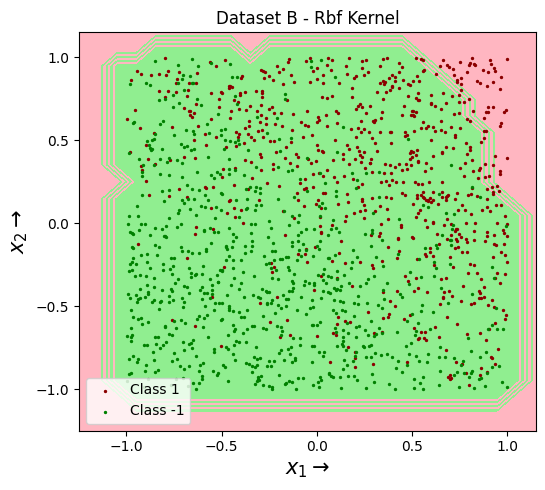

In [27]:

data_A = np.load('/content/dataset_A.npz')
data_B = np.load('/content/dataset_B.npz')
# X_train_A, Y_train_A, X_test_A, Y_test_A = data_A['arr_0'], data_A['arr_1'], data_A['arr_2'], data_A['arr_3']
# minX_A = min(X_train_A[:, 0]), min(X_train_A[:, 1])
# maxX_A = max(X_train_A[:, 0]), max(X_train_A[:, 1])
# X_A, Y_A = np.meshgrid(np.arange(minX_A[0]-0.5, maxX_A[0]+0.5, 0.05), np.arange(minX_A[1]-0.5, maxX_A[1]+0.5, 0.05))
# samples_A = np.concatenate([X_A.reshape(-1, 1), Y_A.reshape(-1, 1)], axis=1)

# # Define parameters for dataset A
# reg_param_A = [0.0001, 0.001, 0.0001]
# kernel_param_A = [1, 3, 1]

# plt.figure(figsize=(15, 5))
# for i, kernel in enumerate(['linear', 'poly', 'rbf']):
#     alpha_A = train_pred_logistic_regression(X_train_A, Y_train_A, kernel=kernel, reg_param=reg_param_A[i], kernel_param=kernel_param_A[i], num_iter_gd=100)
#     Y_estimate_A = test_prediction(alpha_A, X_train_A, Y_train_A, samples_A, kernel=kernel, kernel_param=kernel_param_A[i])

#     plt.subplot(1, 3, i+1)
#     plt.contourf(X_A, Y_A, Y_estimate_A.reshape(X_A.shape), colors=['#FF0000', '#00FF00'])
#     plt.scatter(X_train_A[Y_train_A == 1][:, 0], X_train_A[Y_train_A == 1][:, 1], s=2, c='#0000ff', label='Class 1')
#     plt.scatter(X_train_A[Y_train_A == -1][:, 0], X_train_A[Y_train_A == -1][:, 1], s=2, c='#FFC0CB', label='Class -1')
#     plt.title(f'Dataset A - {kernel.capitalize()} Kernel')
#     plt.xlabel(r'$x_{1}\rightarrow$', size=15)
#     plt.ylabel(r'$x_{2}\rightarrow$', size=15)
#     plt.legend()

# plt.tight_layout()
# plt.show()

# Dataset B
X_train_B, Y_train_B, X_test_B, Y_test_B = data_B['arr_0'], data_B['arr_1'], data_B['arr_2'], data_B['arr_3']
minX_B = min(X_train_B[:, 0]), min(X_train_B[:, 1])
maxX_B = max(X_train_B[:, 0]), max(X_train_B[:, 1])
X_B, Y_B = np.meshgrid(np.arange(minX_B[0]-0.25, maxX_B[0]+0.25, 0.1), np.arange(minX_B[1]-0.25, maxX_B[1]+0.25, 0.1))
samples_B = np.concatenate([X_B.reshape(-1, 1), Y_B.reshape(-1, 1)], axis=1)

# Define parameters for dataset B
# reg_param_B = [.01, .001, 0.01]
# kernel_param_B = [1, 4, 100]
reg_param_B = [0.01]
kernel_param_B = [ 100]
# reg_param_B = [.01]
# kernel_param_B = [ 4]

plt.figure(figsize=(15, 5))
for i, kernel in enumerate(['rbf']):
    alpha_B = train_pred_logistic_regression(X_train_B, Y_train_B, .0001,kernel=kernel, reg_param=reg_param_B[i], kernel_param=kernel_param_B[i], num_iter_gd=100)
    Y_estimate_B = test_prediction(alpha_B, X_train_B, Y_train_B, samples_B, kernel=kernel, kernel_param=kernel_param_B[i])

    plt.subplot(1, 3, i+1)
    plt.contourf(X_B, Y_B, Y_estimate_B.reshape(X_B.shape), colors=['#90EE90','#FFB6C1' ])
    plt.scatter(X_train_B[Y_train_B == 1][:, 0], X_train_B[Y_train_B == 1][:, 1], s=2, c='#8B0000', label='Class 1')
    plt.scatter(X_train_B[Y_train_B == -1][:, 0], X_train_B[Y_train_B == -1][:, 1], s=2, c='#008000', label='Class -1')
    plt.title(f'Dataset B - {kernel.capitalize()} Kernel')
    plt.xlabel(r'$x_{1}\rightarrow$', size=15)
    plt.ylabel(r'$x_{2}\rightarrow$', size=15)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
# Define kernel types
kernels = ['linear', 'poly', 'rbf']

#datasetA
data_A=np.load("/content/dataset_A.npz")
X_train,Y_train,X_test,Y_test=data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
X_min, X_max = X_train[:, 0].min() - 0.25, X_train[:, 0].max() + 0.25
Y_min, Y_max = X_train[:, 1].min() - 0.25, X_train[:, 1].max() + 0.25
xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.1),np.arange(Y_min, Y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]
# reg_A_param = [.01, .001, .01]
reg_A_param=[0.001, 0, 0.1]
kernel_A_param=[1, 5, 10]
# kernel_A_param = [1, 3, .01]
plt.figure(figsize=(18, 6))
for j, kernel in enumerate(kernels):
    alpha = train_pred_logistic_regression(X_train, Y_train,learning_rate=0.01, kernel=kernel,
                                            reg_param=reg_A_param[j],
                                            kernel_param=kernel_A_param[j],
                                            num_iter_gd=100)
    Z = test_prediction(alpha, X_train, Y_train, grid, kernel=kernel,
                  kernel_param=kernel_A_param[j])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 3, j + 1)
    plt.contourf(xx, yy, Z, alpha=0.15, cmap="prism")
    plt.contour(xx, yy, Z, alpha=1, cmap=plt.cm.binary, linewidths=1)
    plt.scatter(X_train[:, 0], X_train[:, 1],
                c=Y_train, cmap=plt.cm.binary)
    plt.title(f"{data_A} - Kernel: {kernel}")
plt.show()

#dataset_b

#datasetA
data_B=np.load("/content/dataset_B.npz")
X_train,Y_train,X_test,Y_test=data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']
X_min, X_max = X_train[:, 0].min() - 0.25, X_train[:, 0].max() + 0.25
Y_min, Y_max = X_train[:, 1].min() - 0.25, X_train[:, 1].max() + 0.25
xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.1),np.arange(Y_min, Y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]
# reg_param = [.001, 0, .1]
reg_param=[.01, 0.001, 0.01]
# kernel_param = [1, 5, 10]
kernel_param=[1, 3, .01]
plt.figure(figsize=(18, 6))
for j, kernel in enumerate(kernels):
    alpha = train_pred_logistic_regression(X_train, Y_train,learning_rate=0.01, kernel=kernel,
                                            reg_param=reg_param[j],
                                            kernel_param=kernel_param[j],
                                            num_iter_gd=100)
    Z = test_prediction(alpha, X_train, Y_train, grid, kernel=kernel,
                  kernel_param=kernel_param[j])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 3, j + 1)
    plt.contourf(xx, yy, Z, alpha=0.15, cmap="prism")
    plt.contour(xx, yy, Z, alpha=1, cmap=plt.cm.binary, linewidths=1)
    plt.scatter(X_train[:, 0], X_train[:, 1],
                c=Y_train, cmap=plt.cm.binary)
    plt.title(f"{data_B} - Kernel: {kernel}")
plt.show()





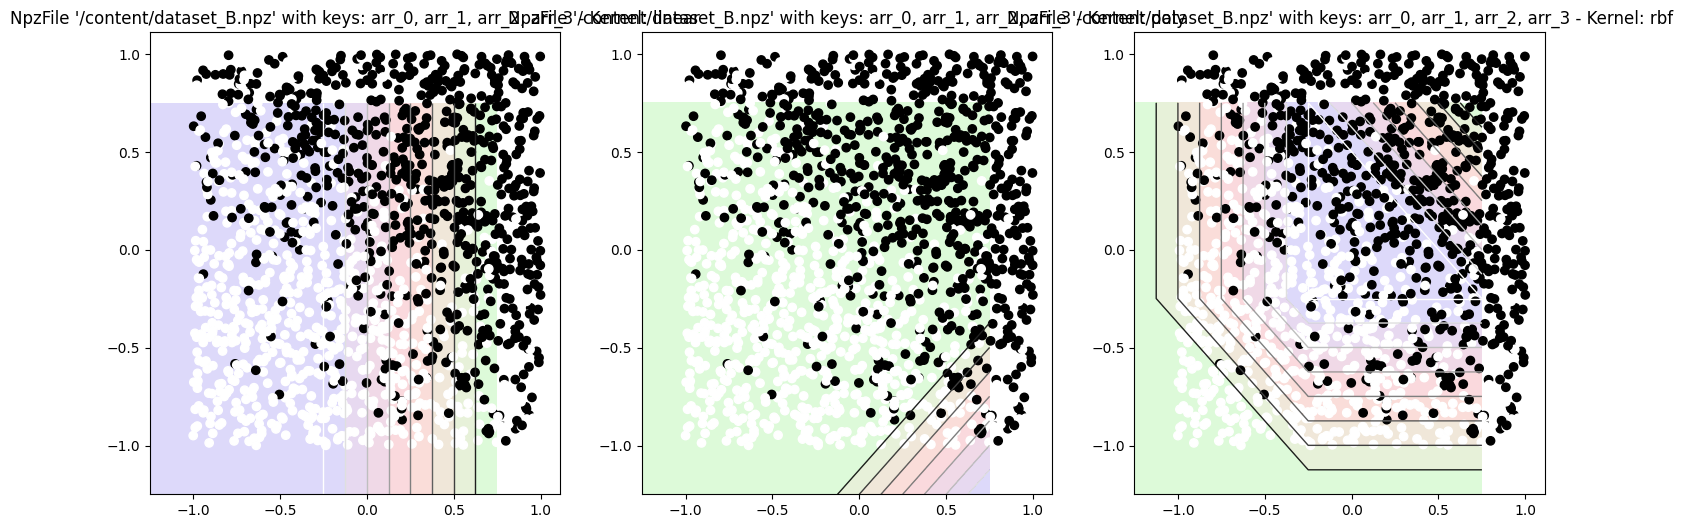

In [8]:
kernels = ['linear', 'poly', 'rbf']

#datasetA
data_A=np.load("/content/dataset_B.npz")
X_train,Y_train,X_test,Y_test=data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
X_min, X_max = X_train[:, 0].min() - 0.25, X_train[:, 0].max() + 0.25
Y_min, Y_max = X_train[:, 1].min() - 0.25, X_train[:, 1].max() + 0.25
xx, yy = np.meshgrid(np.arange(X_min, X_max, 1),np.arange(Y_min, Y_max, 1))
grid = np.c_[xx.ravel(), yy.ravel()]
# reg_A_param = [.01, .001, .01]
reg_A_param=[0.01, 1, 0.01]
kernel_A_param=[1, 2, 100]
# kernel_A_param = [1, 3, .01]
plt.figure(figsize=(18, 6))
for j, kernel in enumerate(kernels):
    alpha = train_pred_logistic_regression(X_train, Y_train,learning_rate=0.001, kernel=kernel,
                                            reg_param=reg_A_param[j],
                                            kernel_param=kernel_A_param[j],
                                            num_iter_gd=100)
    Z = test_prediction(alpha, X_train, Y_train, grid, kernel=kernel,
                  kernel_param=kernel_A_param[j])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 3, j + 1)
    plt.contourf(xx, yy, Z, alpha=0.15, cmap="brg")
    plt.contour(xx, yy, Z, alpha=1, cmap=plt.cm.binary, linewidths=1)
    plt.scatter(X_train[:, 0], X_train[:, 1],
                c=Y_train, cmap=plt.cm.binary)
    plt.title(f"{data_A} - Kernel: {kernel}")
plt.show()


**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [ ]:
# CodeWrite cell
# Write Decision tree classifier from scratch,
# write only functions here (you may write extra functions here if you wish)
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, class_label=None):
    self.right=left
    self.left=right
    self.feature=feature
    self.class_label=class_label
    self.feature=feature
    self.class_sign=""
    self.stop_check=True

def entropy(u):
    # Check for invalid input values
    if u == 0 or u == 1:
        return 0  # Entropy is 0 for perfect classification
    else:
        return -1 * (u * np.log(u) + (1 - u) * np.log(1 - u))

def tree_by_entropy(X_train,Y_train,num_nums_stop):
  root=Node();
  if np.all(Y_train == Y_train[0]):  # Check if all labels are the same
    root.class_label = np.sign(np.sum(Y_train))  # Predict the majority class
    return root
  else:
    threshold,split_feature_index,entropy_min=0,0,float('inf')

    for i in range(X_train.shape[1]):
      for j in range(X_train.shape[0]):
        current_feature=X_train[j,i]
        #get all points lies divide by current_feature
        greater_feature=Y_train[X_train[:,i]>current_feature]
        lesser_feature=Y_train[X_train[:,i]<=current_feature]
        # all point on right side are same class
        if(greater_feature.shape[0] == Y_train.shape[0]):
          #assume label= +1/-1 getting fracion of points
          greater_class_feature=1
          lesser_class_feature=0
        elif(lesser_feature.shape[0] == Y_train.shape[0]):
          lesser_class_feature=1
          greater_class_feature=0;
        else:
          #check for only +1 class for above and below the current_feature
          lesser_class_feature=lesser_feature[lesser_feature==1].shape[0]/lesser_feature[0]
          greater_class_feature=greater_feature[greater_feature==1].shape[0]/greater_feature[0]
        entropy_lesser_class=entropy( lesser_class_feature)
        entropy_greater_classs=entropy(greater_class_feature)
        entropy_avg=(lesser_feature.shape[0]*entropy_lesser_class + greater_feature.shape[0]*entropy_greater_classs)/Y_train.shape[0]
        if entropy_min>entropy_avg:
            entropy_min=entropy_avg
            split_feature_index=i
            threshold=current_feature
    root.feature=split_feature_index
    root.threshold=threshold
    X_left_node=X_train[X_train[:,split_feature_index]<=threshold]
    Y_left_node=Y_train[X_train[:,split_feature_index]<=threshold]
    X_right_node=X_train[X_train[:,split_feature_index]>threshold]
    Y_right_node=Y_train[X_train[:,split_feature_index]>threshold]
    ##overfitting
    if Y_right_node.shape[0]/Y_train.shape[0]<=0.05 or Y_right_node.shape[0]/Y_train.shape[0]>=0.95 :
      root.class_label=np.sign(np.sum(Y_train))
      return root
    else:
      # root.stop_check=False
      # root.right=tree_by_entropy(X_right_node,Y_right_node,num_nums_stop)
      # root.left=tree_by_entropy(X_left_node,Y_left_node,num_nums_stop)
      # return root
      root.stop_check=False
      root.right=tree_by_accuracy(X_right_node,Y_right_node,num_nums_stop)
      root.left=tree_by_accuracy(X_left_node,Y_left_node,num_nums_stop)
      if root.left.stop_check==True:
            if root.class_sign=="less":
              root.left.class_label=-1
            else:
              root.left.class_label=+1
      if root.right.stop_check==True:
            if root.class_sign=="less":
              root.right.class_label=+1
            else:
              root.right.class_label=-1
      return root


def tree_by_accuracy(X_train,Y_train,num_nums_stop):
  root=Node();
  if np.all(Y_train == Y_train[0]):  # Check if all labels are the same
    root.class_label = np.sign(np.sum(Y_train))  # Predict the majority class
    return root
  else:
    threshold,split_feature_index,accuracy_max=0,0,float('inf')

    for i in range(X_train.shape[1]):
      for j in range(X_train.shape[0]):
        current_feature=X_train[j,i]
        #get all points lies divide by current_feature
        greater__side_feature=Y_train[X_train[:,i]>current_feature]
        lesser_side_feature=Y_train[X_train[:,i]<=current_feature]
        #check for left side contain -1 and right side +1
        lesser_side_accuracy=(lesser_side_feature[lesser_side_feature==-1].shape[0]+greater__side_feature[greater__side_feature==1].shape[0])/Y_train.shape[0]
        #check for left side contain +1 and right side -11
        greater_side_accuracy=(lesser_side_feature[lesser_side_feature==1].shape[0]+greater__side_feature[greater__side_feature==-1].shape[0])/Y_train.shape[0]
        split_acuracy=max(lesser_side_accuracy,greater_side_accuracy)
        if(split_acuracy==lesser_side_accuracy):
          threshold=current_feature
          accuracy_max=lesser_side_accuracy
          split_feature_index=i
        else:
          threshold=current_feature
          accuracy_max=greater_side_accuracy
          split_feature_index=i
    root.feature=split_feature_index
    root.threshold=threshold
    X_left_node=X_train[X_train[:,split_feature_index]<=threshold]
    Y_left_node=Y_train[X_train[:,split_feature_index]<=threshold]
    X_right_node=X_train[X_train[:,split_feature_index]>threshold]
    Y_right_node=Y_train[X_train[:,split_feature_index]>threshold]
    ##overfitting
    if Y_right_node.shape[0]/Y_train.shape[0]<=0.05 or Y_right_node.shape[0]/Y_train.shape[0]>=0.95 :
      root.class_label=np.sign(np.sum(Y_train))
      return root
    else:
      root.stop_check=False
      root.right=tree_by_accuracy(X_right_node,Y_right_node,num_nums_stop)
      root.left=tree_by_accuracy(X_left_node,Y_left_node,num_nums_stop)
      if root.left.stop_check==True:
            if root.class_sign=="less":
              root.left.class_label=-1
            else:
              root.left.class_label=+1
      if root.right.stop_check==True:
            if root.class_sign=="less":
              root.right.class_label=+1
            else:
              root.right.class_label=-1
      return root



def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    if criterion=='accuracy':
      return tree_by_accuracy(X,Y,num_nodes_stop)
    else:
      return tree_by_entropy(X,Y,num_nodes_stop)


def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""

    Y_prediction=np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
      root=tree
      while(root.stop_check==False):
        if test_X[i,root.feature]<=root.threshold:
          root=root.left
        else:
          root=root.right
      Y_prediction[i]=root.class_label
    return Y_prediction



In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.
# Initialize arrays to store errors and optimal hyperparameters
num_datasets = 4
count=12
num_nodes_hyperparam=  [30,50,100,200,250,300,400,500,600,700,800,900]
error_test_accur = np.zeros(num_datasets)
error_test_entropy = np.zeros(num_datasets)
error_train_accur = np.zeros(num_datasets)
error_train_entropy = np.zeros(num_datasets)
opt_nodes_accur = np.zeros(num_datasets, dtype=int)
opt_nodes_entropy = np.zeros(num_datasets, dtype=int)

# Path to the directory containing datasets
data_path = '/content/drive/MyDrive/PRML ASSIgn/'
# Loop over datasets
for i in range(num_datasets):
    dataset_name = chr(65 + i)
    dataSet = np.load(data_path + f'dataset_{dataset_name}.npz')
    X_train, Y_train, X_test, Y_test = dataSet['arr_0'], dataSet['arr_1'], dataSet['arr_2'], dataSet['arr_3']

    # Loop over hyperparameters
    accur1 = np.zeros(count)
    accur2 = np.zeros(count)
    for j in range(count):
        tree_1 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[j], criterion='accuracy')
        tree_2 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[j], criterion='entropy')

        # Validation on a subset of training data
        val_X = X_train[:200]
        val_Y = Y_train[:200]
        Y_predict1 = eval_decision_tree(tree_1, val_X)
        Y_predict2 = eval_decision_tree(tree_2, val_X)

        # Calculate error rates
        accur1[j] = 1 - np.sum(val_Y == Y_predict1) / len(val_Y)
        accur2[j] = 1 - np.sum(val_Y == Y_predict2) / len(val_Y)

    # Find optimal hyperparameters and corresponding errors
    opt_nodes_accur[i] = num_nodes_hyperparam[np.argmin(accur1)]
    opt_nodes_entropy[i] = num_nodes_hyperparam[np.argmin(accur2)]
    error_train_accur[i] = np.min(accur1)
    error_train_entropy[i] = np.min(accur2)

    # Evaluate on test set
    tree_accur = train_decision_tree(X_train, Y_train, num_nodes_stop=opt_nodes_accur[i], criterion='accuracy')
    tree_entropy = train_decision_tree(X_train, Y_train, num_nodes_stop=opt_nodes_entropy[i], criterion='entropy')
    Y_predict_accur = eval_decision_tree(tree_accur, X_test)
    Y_predict_entropy = eval_decision_tree(tree_entropy, X_test)

    # Calculate test errors
    error_test_accur[i] = 1 - np.sum(Y_test == Y_predict_accur) / len(Y_test)
    error_test_entropy[i] = 1 - np.sum(Y_test == Y_predict_entropy) / len(Y_test)






<ipython-input-20-364f1fcd72a5>:19: RuntimeWarning: invalid value encountered in log
  return -1 * (u * np.log(u) + (1 - u) * np.log(1 - u))


In [ ]:
print("Entropy Criterion:\n")
print("Dataset\tStopping node choice\tTrain zero-one error\tTest zero-one error")
for i in range(num_datasets):
    print(f"{chr(65 + i)}\t{opt_nodes_entropy[i]}\t\t\t{error_train_entropy[i]:.1%}\t\t\t{error_test_entropy[i]:.1%}")

print("\nAccuracy Criterion:\n")
print("Dataset\tStopping node choice\tTrain zero-one error\tTest zero-one error")
for i in range(num_datasets):
    print(f"{chr(65 + i)}\t{opt_nodes_accur[i]}\t\t\t{error_train_accur[i]:.1%}\t\t\t{error_test_accur[i]:.1%}")


Entropy Criterion:

Dataset	Stopping node choice	Train zero-one error	Test zero-one error
A	30			49.0%			50.2%
B	30			43.5%			51.2%
C	30			50.0%			48.8%
D	30			52.0%			23.1%

Accuracy Criterion:

Dataset	Stopping node choice	Train zero-one error	Test zero-one error
A	30			30.0%			31.6%
B	30			57.0%			49.4%
C	30			50.0%			51.2%
D	30			51.0%			23.1%


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  



<ipython-input-20-364f1fcd72a5>:19: RuntimeWarning: invalid value encountered in log
  return -1 * (u * np.log(u) + (1 - u) * np.log(1 - u))


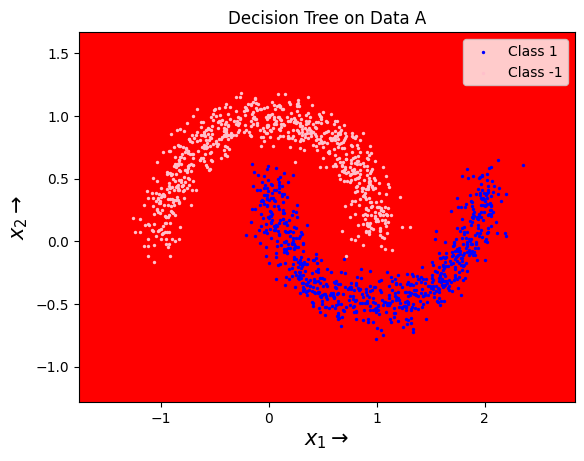

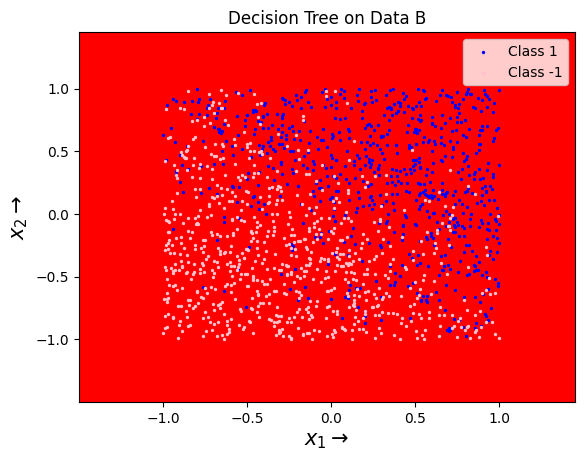

In [ ]:
datasets = ['/content/drive/MyDrive/PRML ASSIgn/dataset_A.npz', '/content/drive/MyDrive/PRML ASSIgn/dataset_B.npz']
labels = ['Data A', 'Data B']
num_nodes_stop = 250

for i, dataset_filename in enumerate(datasets):
    # Load data
    dataSet = np.load(dataset_filename)
    X_train, Y_train, X_test, Y_test = dataSet['arr_0'], dataSet['arr_1'], dataSet['arr_2'], dataSet['arr_3']

    # Find minimum and maximum values for features
    minX = min(X_train[:, 0]), min(X_train[:, 1])
    maxX = max(X_train[:, 0]), max(X_train[:, 1])

    # Create meshgrid for prediction
    X, Y = np.meshgrid(np.arange(minX[0]-0.5, maxX[0]+0.5, 0.05), np.arange(minX[1]-0.5, maxX[1]+0.5, 0.05))
    samples = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

    # Train decision tree
    tree = train_decision_tree(X_train, Y_train, num_nodes_stop, criterion='entropy')

    # Evaluate decision tree
    Y_prediction = eval_decision_tree(tree, samples)

    # Create plot
    plt.figure(i)
    plt.contourf(X, Y, Y_prediction.reshape(X.shape), colors=['#FF0000', '#00FF00'])

    # Scatter plot for training data points
    plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], s=2, c='#0000ff', label='Class 1')
    plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s=2, c='#FFC0CB', label='Class -1')

    # Set plot titles and labels
    plt.title(f'Decision Tree on {labels[i]}')
    plt.xlabel(r'$x_{1}\rightarrow$', size=15)
    plt.ylabel(r'$x_{2}\rightarrow$', size=15)
    plt.legend()

plt.show()


**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier.
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1,
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y.
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """



def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and
    returns the tree predicted values at those instances."""




In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.



TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  


In [ ]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [ ]:
# Codewrite cell
# Write code to run here (no plotting)


In [ ]:
# Codewrite cell
# Plots for iteration vs error here


In [ ]:
# Codewrite cell
# Plots for illustrating the classifier here


Textwrite cell:

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set.

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional).




In [ ]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs

    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

In [ ]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need
# like evaluating the mean squared error or the gradient w.r.t. w

data=np.load('/content/drive/MyDrive/PRML ASSIgn/LassoReg_data.npz')
X=data['arr_0']
Y=data['arr_1']

train_size = int(0.5 * X.shape[0])
val_size = int(0.25 * X.shape[0])

X_train,X_val,X_test=X[:train_size], X[train_size:train_size+val_size],X[train_size+val_size:]
Y_train,Y_val,Y_test=Y[:train_size], Y[train_size:train_size+val_size],Y[train_size+val_size:]


def mean_squared_error(y_true, y_pred):
    # Ensure y_true and y_pred are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate squared differences
    squared_errors = (y_true - y_pred) ** 2

    # Calculate mean squared error
    mse = np.mean(squared_errors)
    return mse

def get_gradient(w):
    return np.dot(np.dot(X_train.T, X_train),w) - np.dot(X_train.T,Y_train)

1000


In [ ]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.


best_model = None
best_val_mse = np.inf
best_l1_norm= 0
best_learning=0

learning_rates = [0.0001, 0.001, 0.1,1]
l1_norms = [2,4,8,16]
#l1_norms=[1.5,2.5,4.5,8]

def lasso_regression(X_train,Y_train,l1_norm,learning_rate):
  #w = np.zeros(X_train.shape[1])
  w=np.random.randn(X_train.shape[1])
  for i in range (5000):
    w=w-learning_rate*get_gradient(w)
    w=projection_oracle_l1(w,l1_norm)
  return w
# Also write code for doing validation of the learned model using the validation set
for rd in learning_rates:
  for radius in l1_norms:
    w = lasso_regression(X_train, Y_train,radius,rd)  # Set max_iter to avoid potential non-convergence
    val_pred = np.dot(X_val, w)
    val_mse = mean_squared_error(Y_val, val_pred)
    if val_mse < best_val_mse:
      best_model = w
      best_val_mse = val_mse
      best_l1_norm = rd
      best_learning=radius
  # Evaluate test performance and report results
  #print(best_model)
  test_pred = np.dot(X_test, best_model)
  test_mse = mean_squared_error(Y_test,test_pred)

  # Top 10 feature indices and values (absolute value sorting)
  top_10_indices = np.argsort(abs(best_model))[-1:-11:-1]
  top_10_weights = best_model[top_10_indices]

  # Print results
  print(f"For L1_norm : {rd}")
  print(f"Test MSE: {test_mse}")
  print(f"Top 10 Feature Indices: {top_10_indices}")
  print(f"Top 10 Feature Weights: {top_10_weights}")
  print("<-------------------->")
  print()


For L1_norm : 0.0001
Test MSE: 0.11247884340565367
Top 10 Feature Indices: [107 390 237 195 760 762 766  79 157 187]
Top 10 Feature Weights: [ 0.81830783  0.15138778  0.06930513  0.05900971 -0.0561647  -0.04392073
 -0.03923289  0.03612478  0.03581285 -0.03505008]
<-------------------->

For L1_norm : 0.001
Test MSE: 0.09080623042732021
Top 10 Feature Indices: [107 390 760 438 898 195 766 912 762 566]
Top 10 Feature Weights: [ 0.83175104  0.18143819 -0.07149358  0.06671923 -0.04625795  0.04293531
 -0.03463077 -0.03338781 -0.03333491  0.03078379]
<-------------------->

For L1_norm : 0.1
Test MSE: 0.09080623042732021
Top 10 Feature Indices: [107 390 760 438 898 195 766 912 762 566]
Top 10 Feature Weights: [ 0.83175104  0.18143819 -0.07149358  0.06671923 -0.04625795  0.04293531
 -0.03463077 -0.03338781 -0.03333491  0.03078379]
<-------------------->

For L1_norm : 1
Test MSE: 0.09080623042732021
Top 10 Feature Indices: [107 390 760 438 898 195 766 912 762 566]
Top 10 Feature Weights: [ 0.

In [ ]:
test_pred = np.dot(X_test, best_model)
test_mse = mean_squared_error(Y_test,test_pred)

  # Top 10 feature indices and values (absolute value sorting)
top_10_indices = np.argsort(abs(best_model))[-1:-10:-1]
top_10_weights = best_model[top_10_indices]

  # Print results
print(f"For L1_norm : {best_l1_norm}")
print(f"For Learning : {best_learning}")
print(f"Best Test MSE: {test_mse}")
print(f"Top 10 Feature Indices: {top_10_indices}")
print(f"Top 10 Feature Weights: {top_10_weights}")

For L1_norm : 0.001
For Learning : 2
Best Test MSE: 0.09080623042732021
Top 10 Feature Indices: [107 390 760 438 898 195 766 912 762]
Top 10 Feature Weights: [ 0.83175104  0.18143819 -0.07149358  0.06671923 -0.04625795  0.04293531
 -0.03463077 -0.03338781 -0.03333491]


#Textwrite cell:


For L1_norm : 0.001

For Learning : 2

Best Test MSE: 0.

Top 10 Feature Indices: [107 390 760 237 195 912 718 766 762]

Top 10 Feature Weights: [ 0.8125009   0.17684907 -0.06615982  0.06396548  0.05736865 -0.04711154  0.04652067 -0.04508183 -0.0388802 ]